<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/tien_viet_nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [5]:
%cd '/content/drive/MyDrive/tien'

/content/drive/MyDrive/tien


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/tien/Training_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 639 images belonging to 11 classes.


In [7]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/tien/Test_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 283 images belonging to 11 classes.


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(training_set,epochs = 30,validation_data=test_set,verbose = 1)

Epoch 1/30
20/20 [==============================] - 414s 20s/step - loss: 2.5758 - accuracy: 0.1565 - val_loss: 2.3404 - val_accuracy: 0.1201
Epoch 2/30
20/20 [==============================] - 67s 3s/step - loss: 2.1124 - accuracy: 0.2394 - val_loss: 2.2554 - val_accuracy: 0.2085
Epoch 3/30
20/20 [==============================] - 67s 3s/step - loss: 1.7023 - accuracy: 0.4100 - val_loss: 1.5281 - val_accuracy: 0.4205
Epoch 4/30
20/20 [==============================] - 67s 3s/step - loss: 1.3071 - accuracy: 0.5368 - val_loss: 1.5073 - val_accuracy: 0.4700
Epoch 5/30
20/20 [==============================] - 86s 4s/step - loss: 1.1587 - accuracy: 0.6088 - val_loss: 1.0512 - val_accuracy: 0.6290
Epoch 6/30
20/20 [==============================] - 67s 3s/step - loss: 0.9217 - accuracy: 0.6776 - val_loss: 0.8912 - val_accuracy: 0.6926
Epoch 7/30
20/20 [==============================] - 67s 3s/step - loss: 0.8826 - accuracy: 0.7121 - val_loss: 0.9281 - val_accuracy: 0.6678
Epoch 8/30
20/20 [

In [10]:
training_set.class_indices

{'1 ngàn': 0,
 '10 ngàn': 1,
 '100 ngàn': 2,
 '100 đồng': 3,
 '2 ngàn': 4,
 '20 ngàn': 5,
 '200 ngàn': 6,
 '5 ngàn': 7,
 '50 ngàn': 8,
 '500 ngàn': 9,
 '500 đồng': 10}

In [11]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

1/1 [==============================] - 0s 21ms/step


array([6])

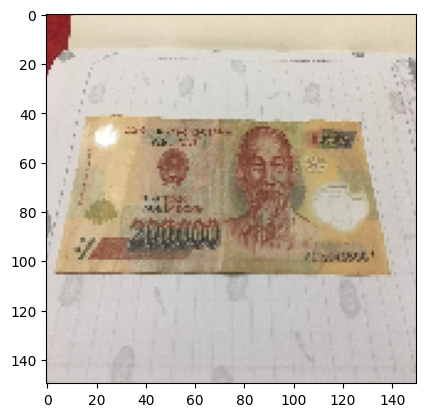

In [14]:
img = load_img('/content/drive/MyDrive/tien/val/z3430616007373_90a1cd57b6f1fb242862c9a4b06c495d.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

1/1 [==============================] - 0s 20ms/step


array([9])

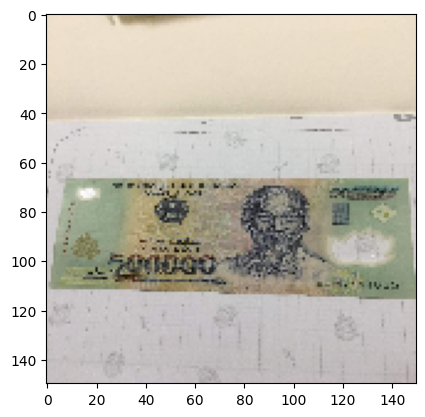

In [15]:
img = load_img('/content/drive/MyDrive/tien/val/z3430622572463_b4921822be513a0df53f708d25575b52.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)